# **ASSIGNMENT 2** 

## **(Q2) Image Denoising [20 marks]**

In [ ]:
!pip install numpy pillow matplotlib

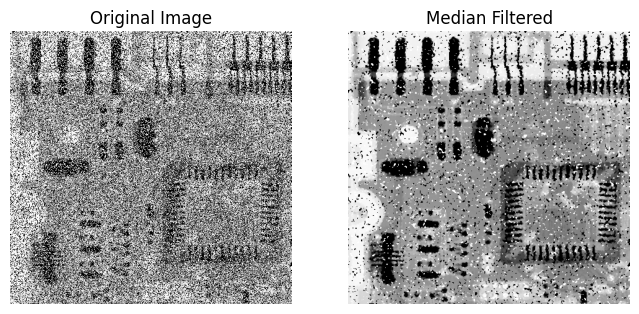

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def median_filter(image_array, kernel_size=7):
    pad = kernel_size // 2
    padded_img = np.pad(image_array, ((pad, pad), (pad, pad), (0,0)), mode='edge')# pad the image to handle borders
    filtered_img = np.zeros_like(image_array)
    
    for i in range(image_array.shape[0]):
        for j in range(image_array.shape[1]):
            for c in range(image_array.shape[2]):  # each channel separately
                window = padded_img[i:i+kernel_size, j:j+kernel_size, c]
                filtered_img[i, j, c] = np.median(window)
    
    return filtered_img



if __name__ == "__main__":
    
    img = Image.open(r"C:\Users\Margamitra\OneDrive\Desktop\MS\Assignments\DIP\Assignment 2\images\2_1.png").convert("RGB")
    img_array = np.array(img)

    # Applying median filter
    filtered_array = median_filter(img_array, kernel_size=3)

    plt.figure(figsize=(8,4))
    
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img_array)
    plt.axis("off")
    
    plt.subplot(1,2,2)
    plt.title("Median Filtered")
    plt.imshow(filtered_array)
    plt.axis("off")
    
    plt.show()


The First Image contains **Salt & Pepper Noise** in it. Hence a Median filter is the ideal choice to remove the noise. 

### For the 2nd image

The 2nd Image contains *Gaussian Noise*, hence the ideal choice for this image would be a Gaussian Filter with appropriate filter size.

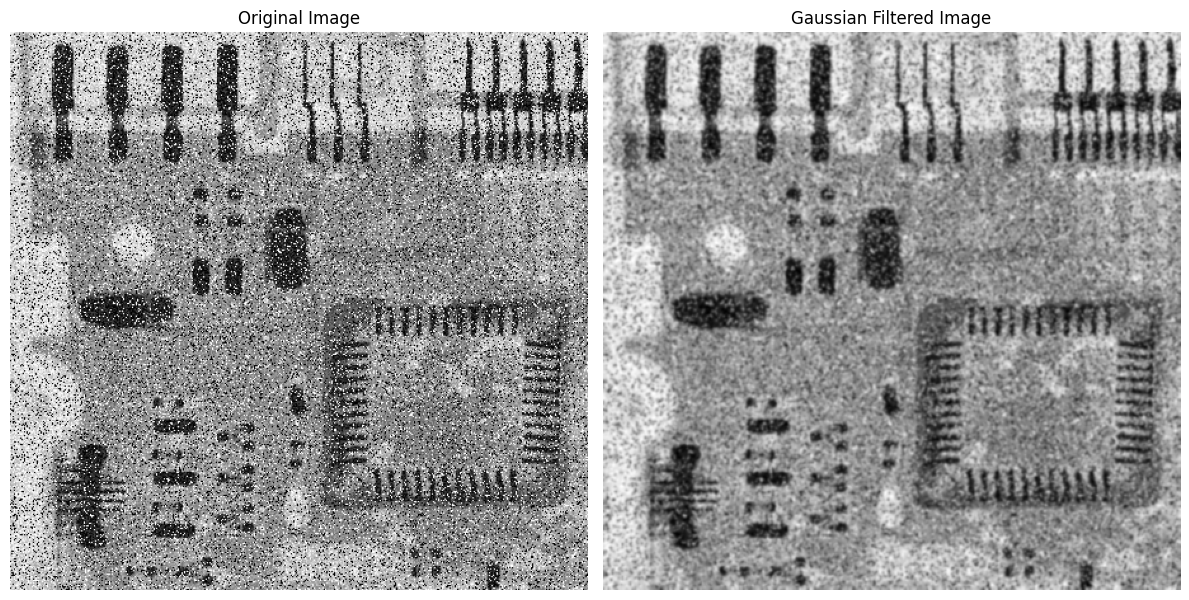

In [13]:
def gaussian_kernel(size, sigma=1.0):
    """Generates a 2D Gaussian kernel."""
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    s = 2 * (sigma ** 2) 

    for x in range(size):
        for y in range(size):
            dx = x - center
            dy = y - center
            kernel[x, y] = np.exp(-(dx**2 + dy**2) / s) # Using standard Gaussian formula

    kernel /= np.sum(kernel)  # Normalize
    return kernel

def apply_convolution(image, kernel):
    """Applying convolution of the image with the given kernel."""
    img_h, img_w = image.shape
    k_size = kernel.shape[0]
    pad = k_size // 2

    # Pad image with reflection to handle borders
    padded_image = np.pad(image, pad_width=pad, mode='reflect')
    output = np.zeros_like(image)

    # Convolution
    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i+k_size, j:j+k_size]
            output[i, j] = np.sum(region * kernel)

    return output

def main():
    # Load image and convert to grayscale
    img = Image.open(r'C:\Users\Margamitra\OneDrive\Desktop\MS\Assignments\DIP\Assignment 2\images\2_2.png').convert('L')  
    img_np = np.array(img, dtype=np.float32)

    # Generate Gaussian kernel
    kernel_size = 7
    sigma = 1.0
    kernel = gaussian_kernel(kernel_size, sigma)

    # Apply Gaussian filter
    filtered_img_np = apply_convolution(img_np, kernel)

    # Clip values to [0,255] and convert to uint8
    filtered_img_np = np.clip(filtered_img_np, 0, 255).astype(np.uint8)

    # Visualization using matplotlib
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].imshow(img_np.astype(np.uint8), cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(filtered_img_np, cmap='gray')
    axs[1].set_title('Gaussian Filtered Image')
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


## (b) Experimenting with different kernel sizes 

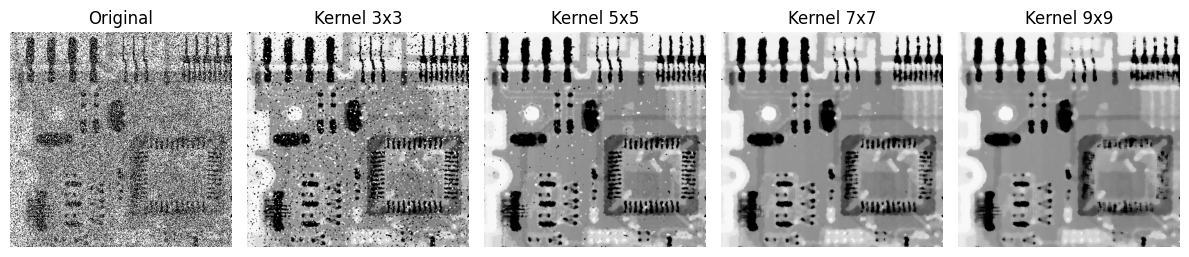

In [9]:
#Storing the differnt kernel sizes in a list
kernel_sizes = [3, 5, 7, 9]

# Applying median filter with different kernel sizes
results = [median_filter(img_array, k) for k in kernel_sizes]


plt.figure(figsize=(12,6))

plt.subplot(1, len(kernel_sizes)+1, 1)
plt.title("Original")
plt.imshow(img_array)
plt.axis("off")

for i, (k, filtered) in enumerate(zip(kernel_sizes, results), start=2):
    plt.subplot(1, len(kernel_sizes)+1, i)
    plt.title(f"Kernel {k}x{k}")
    plt.imshow(filtered)
    plt.axis("off")

plt.tight_layout()
plt.show()

We can see from the examples above that **increasing the kernel sizes** of the **Median Filter** makes the image more clearer by performing better filtering on the salt and pepper noise present in the original picture. 

## (c) Choise of Filtering and other possible alternatives 

**Ans:** Since the original image contains *Salt & Pepper Noise* in it, I have implemented the **Median Filter** to get rid of the noise components. 

Other possible alternatives are : Gaussian filtering, Bilateral filters etc. 

## **(Q3) Bilateral-Filtering for Edge-Preserving Smoothing**

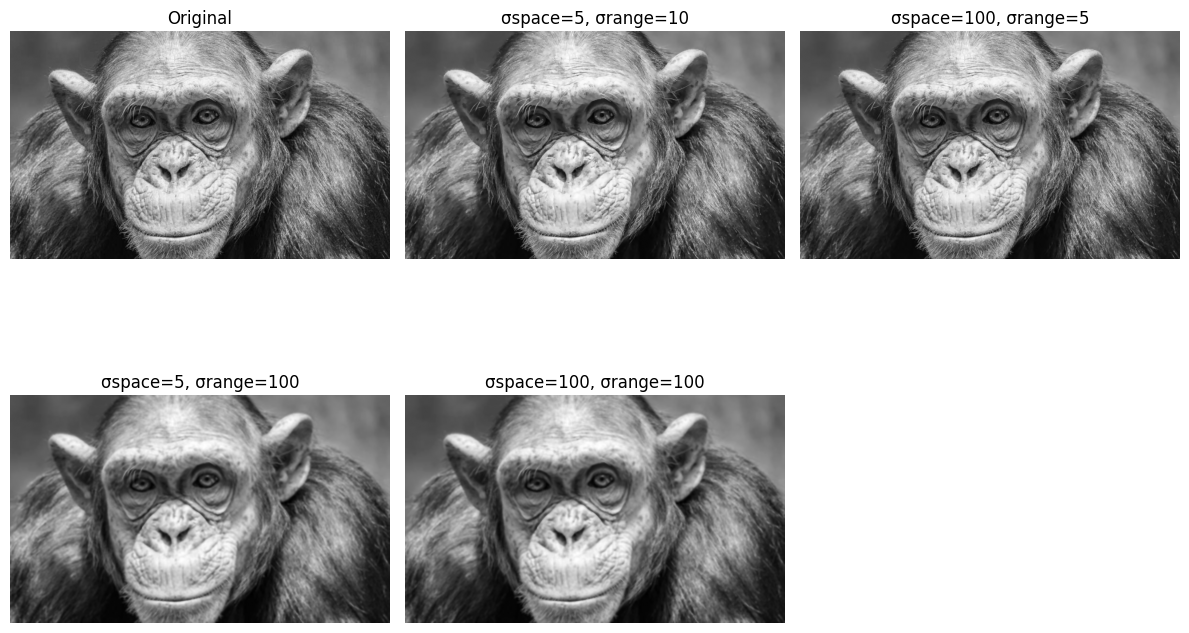

In [44]:
#Bilateral Filter Implementation
def bilateral_filter(img, kernel_size=5, sigma_space=3, sigma_range=25):
    # Ensure image to be grayscale 
    if img.ndim == 3:
        img = np.mean(img, axis=2)  # convert RGB to grayscale
    
    h, w = img.shape
    pad = kernel_size // 2
    padded = np.pad(img, pad, mode='reflect') #Padding the image to handle borders before applying filter
    output = np.zeros_like(img, dtype=np.float32)

    # Precompute spatial Gaussian weights
    x = np.arange(-pad, pad+1)
    y = np.arange(-pad, pad+1)
    X, Y = np.meshgrid(x, y)
    spatial_weights = np.exp(-(X**2 + Y**2) / (2 * sigma_space**2)) #Using standard Gaussian formula

    # Applying the Bilateral filtering
    for i in range(h):
        for j in range(w):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            center_val = padded[i+pad, j+pad]

            # Range Gaussian (depends on intensity difference)
            range_weights = np.exp(-((region - center_val)**2) / (2 * sigma_range**2))

            # Combined weights
            weights = spatial_weights * range_weights

            # Normalize and apply
            output[i, j] = np.sum(weights * region) / np.sum(weights)

    return output.astype(np.uint8)



# b) Parameter Analysis

# Load sample grayscale image
img = Image.open("images/3.jpg").convert("L") 
img = np.array(img, dtype=np.float32)

# Different parameter settings
params = [
    (5, 10),   # small space, small range
    (100, 5),  # large space, small range
    (5, 100),  # small space, large range
    (100, 100), # large space, large range
]

plt.figure(figsize=(12,8))
plt.subplot(2,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis("off")

for k, (s_space, s_range) in enumerate(params, 2):
    filtered = bilateral_filter(img, kernel_size=5, sigma_space=s_space, sigma_range=s_range)
    plt.subplot(2,3,k)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"σspace={s_space}, σrange={s_range}")
    plt.axis("off")

plt.tight_layout()
plt.show()


From the above Examples, we can Observe the following: 

**Large Sigma Range**: This leads to weak edge preservation. The filter starts working just like a Gaussian blur. 

**Small Sigma Range**: Strong edge preservation. The textures are smoothened out, while keeping the edges preserved. 

**Large Sigma Space:** Having a large sigma space, leads to blurring over a very wide region. 

**Small sigma Space:** Leads to only local blurring. 

## (c) Comparison With Gaussian Filter 

In this example, we will use the Bilateral Filter with **σspace = 100** and **σrange = 10** to compare with the Gaussian Filter. 

In [33]:
#Defining Gaussian Filter
def gaussian_filter(img, kernel_size=5, sigma=10):
    if img.ndim == 3:
        img = np.mean(img, axis=2)
    h, w = img.shape
    pad = kernel_size // 2
    padded = np.pad(img, pad, mode='reflect') #Padding the image to handle borders before applying filter
    output = np.zeros_like(img, dtype=np.float32)

    # Gaussian kernel
    x = np.arange(-pad, pad+1)
    y = np.arange(-pad, pad+1)
    X, Y = np.meshgrid(x, y)
    kernel = np.exp(-(X**2 + Y**2) / (2*sigma**2)) # Using standard Gaussian formula
    kernel /= np.sum(kernel)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.sum(region * kernel)

    return output.astype(np.uint8)


# Sobel Edge Detection

def sobel_edge(img):
    if img.ndim == 3:
        img = np.mean(img, axis=2)

    Kx = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
    Ky = np.array([[-1, -2, -1],
                   [ 0,  0,  0],
                   [ 1,  2,  1]])
    h, w = img.shape
    pad = 1
    padded = np.pad(img, pad, mode='reflect')
    Gx = np.zeros_like(img, dtype=np.float32)
    Gy = np.zeros_like(img, dtype=np.float32)

    for i in range(h):
        for j in range(w):
            region = padded[i:i+3, j:j+3]
            Gx[i, j] = np.sum(region * Kx)
            Gy[i, j] = np.sum(region * Ky)

    edges = np.sqrt(Gx**2 + Gy**2)
    edges = (edges / edges.max()) * 255
    return edges.astype(np.uint8)


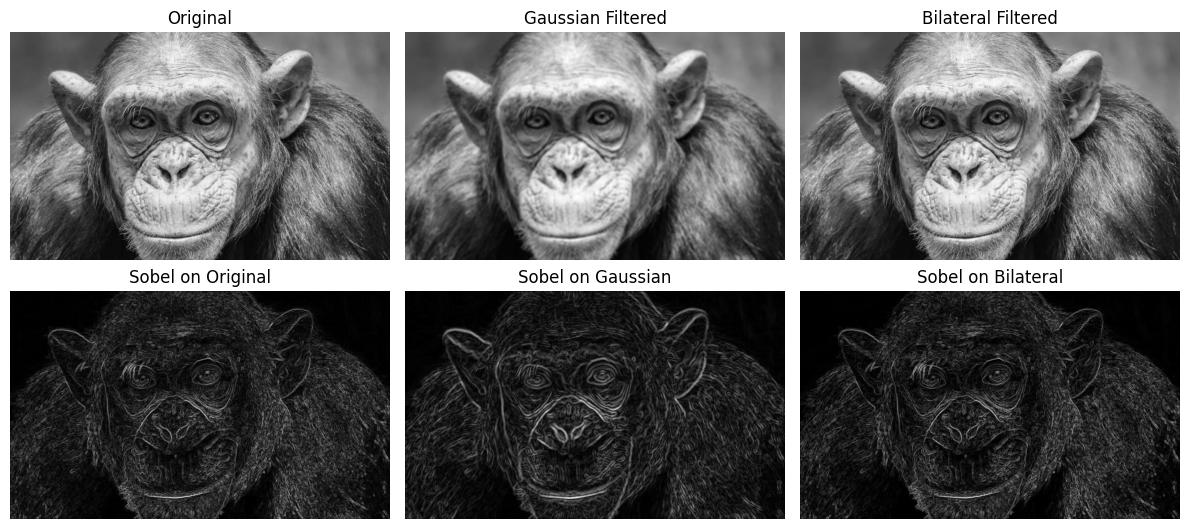

In [46]:
bilat = bilateral_filter(img, kernel_size=5, sigma_space=100, sigma_range=5)

# Gaussian for comparison
gauss = gaussian_filter(img, kernel_size=5, sigma=100)

# ------------------------------
# Sobel Edge Detection
# ------------------------------
edges_orig = sobel_edge(img)
edges_gauss = sobel_edge(gauss)
edges_bilat = sobel_edge(bilat)

# ------------------------------
# Plot Results
# ------------------------------
plt.figure(figsize=(12,8))

plt.subplot(3,3,1)
plt.imshow(img, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(3,3,2)
plt.imshow(gauss, cmap="gray")
plt.title("Gaussian Filtered")
plt.axis("off")

plt.subplot(3,3,3)
plt.imshow(bilat, cmap="gray")
plt.title("Bilateral Filtered")
plt.axis("off")

plt.subplot(3,3,4)
plt.imshow(edges_orig, cmap="gray")
plt.title("Sobel on Original")
plt.axis("off")

plt.subplot(3,3,5)
plt.imshow(edges_gauss, cmap="gray")
plt.title("Sobel on Gaussian")
plt.axis("off")

plt.subplot(3,3,6)
plt.imshow(edges_bilat, cmap="gray")
plt.title("Sobel on Bilateral")
plt.axis("off")

plt.tight_layout()
plt.show()

The **Bilateral Filter** is also called an **"edge-preserving"** filter as it performs smoothening while preserving even minor edges (*such as the eyelashes, in the example above*) but the same is not true for the Gaussian Filter where, the smoothening is applied to the overall image, without preserving any edges. 

## **Q(4) DFT and FFT** 

In [ ]:
!pip install scipy

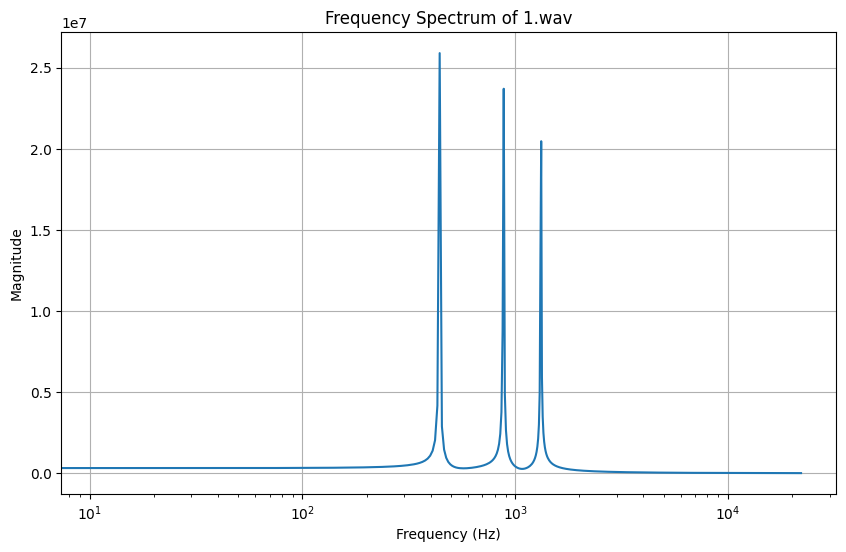

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# DFT Function Definition
def dft1(x):
    """Compute the Discrete Fourier Transform of the 1D array x."""
    N = len(x)
    X = np.zeros(N, dtype=complex)
    n = np.arange(N)
    
    for k in range(N):
        # Compute twiddle factor e^(-j*2πnk/N)
        X[k] = np.sum(x * np.exp(-2j * np.pi * k * n / N)) #Using the standard DFT formula
    
    return X


# Step 2: Load the audio file
samplerate, data = wavfile.read('audio_files/1.wav')

# Make the Audio Mono (take one channel)
if data.ndim > 1:
    data = data[:, 0]

data = data[:4096]

X = dft1(data)

# Compute frequency axis
N = len(data)
freqs = np.fft.fftfreq(N, d=1/samplerate)

# Magnitude spectrum
magnitude = np.abs(X)

#plotting the frequency vs magnitude
plt.figure(figsize=(10, 6))
plt.plot(freqs[:N//2], magnitude[:N//2])  # Only plotting positive frequencies
plt.title("Frequency Spectrum of 1.wav")
plt.xscale('log') # Logarithmic scale for frequency axis
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


## (b) DFT of a 2D Array 

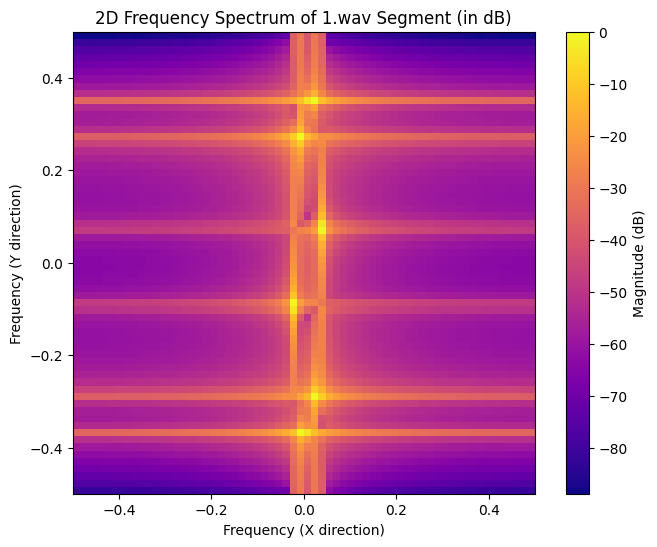

In [ ]:
def dft2(image):
    M, N = image.shape
    X = np.zeros((M, N), dtype=complex)

    m = np.arange(M)
    n = np.arange(N)

    for k in range(M):
        for l in range(N):
            X[k, l] = np.sum(
                image * np.exp(-2j * np.pi * ((k * m[:, None]) / M + (l * n[None, :]) / N))
            )
    return X


# Step 2: Load audio file
samplerate, data = wavfile.read('audio_files/1.wav')

# If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]

# Use only a small segment for clarity and speed
data = data[:4096]

matrix = data[:4096].reshape((64, 64))

X2D = dft2(matrix)

# Magnitude spectrum
magnitude = np.abs(X2D)
magnitude = np.fft.fftshift(magnitude)  # Center low frequencies

#Normalizing for better representation 
magnitude = magnitude / np.max(magnitude)


plt.figure(figsize=(8, 6))
plt.imshow(20 * np.log10(magnitude + 1e-6), cmap='plasma', extent=[-0.5, 0.5, -0.5, 0.5])
plt.title("2D Frequency Spectrum of 1.wav Segment (in dB)")
plt.xlabel("Frequency (X direction)")
plt.ylabel("Frequency (Y direction)")
plt.colorbar(label="Magnitude (dB)")
plt.show()


## (c) DFT of a 1D Array using the FFT algorithm 

In [ ]:
def fft1(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    # Pad to next power of 2
    if np.log2(N) % 1 > 0:
        N_new = 2 ** int(np.ceil(np.log2(N)))
        x = np.pad(x, (0, N_new - N), mode='constant')
        N = N_new

    if N <= 1:
        return x

    # Recursive FFT
    X_even = fft1(x[::2])  # FFT of even-indexed elements
    X_odd  = fft1(x[1::2])  # FFT of odd-indexed elements

    # Twiddle factors
    factor = np.exp(-2j * np.pi * np.arange(N) / N)

    # Combining the results
    X = np.concatenate([
        X_even + factor[:N // 2] * X_odd,
        X_even - factor[:N // 2] * X_odd
    ])

    return X


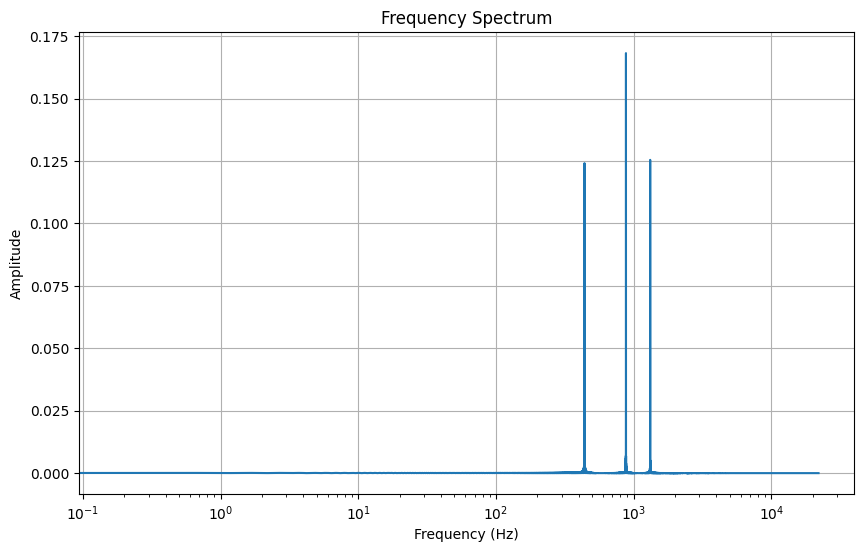

In [16]:
samplerate, data = wavfile.read('audio_files/1.wav')

# If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]

# Normalize to range [-1, 1]
data = data / np.max(np.abs(data))

#Perform FFT 
X = fft1(data)

# Step 3: Compute frequency bins 
N = len(X)
freqs = np.fft.fftfreq(N, d=1/samplerate)


plt.figure(figsize=(10, 6))
plt.plot(freqs[:N//2], np.abs(X[:N//2]) / N)
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.xscale('log')
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## (d) 2D DFT of a 2D Array using FFT 

In [17]:
import numpy as np

def fft2(x):
    x = np.asarray(x, dtype=float)
    rows, cols = x.shape

    # Pad rows and columns to next power of 2 for efficiency
    def next_pow2(n):
        return 2 ** int(np.ceil(np.log2(n)))

    new_rows, new_cols = next_pow2(rows), next_pow2(cols)
    if (new_rows != rows) or (new_cols != cols):
        x = np.pad(x, ((0, new_rows - rows), (0, new_cols - cols)), mode='constant')

    # Step 1: Apply FFT to each row
    X = np.array([fft1(row) for row in x])

    # Step 2: Apply FFT to each column
    X = np.array([fft1(col) for col in X.T]).T

    return X


C:\Users\Margamitra\AppData\Local\Temp\ipykernel_41916\2482012378.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)


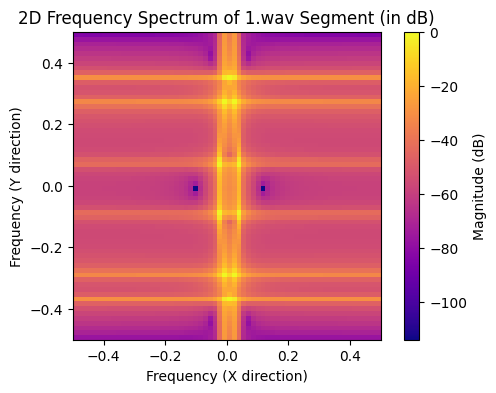

In [24]:
samplerate, data = wavfile.read('audio_files/1.wav')

# If stereo, take one channel
if data.ndim > 1:
    data = data[:, 0]

# Use only a small segment for clarity and speed
data = data[:4096]

matrix = data[:4096].reshape((64, 64))

X2D = fft2(matrix)

# Magnitude spectrum
magnitude = np.abs(X2D)
magnitude = np.fft.fftshift(magnitude)  # Center low frequencies

#Normalizing for better representation 
magnitude = magnitude / np.max(magnitude)


plt.figure(figsize=(6,4))
plt.imshow(20 * np.log10(magnitude + 1e-6), cmap='plasma', extent=[-0.5, 0.5, -0.5, 0.5])
plt.title("2D Frequency Spectrum of 1.wav Segment (in dB)")
plt.xlabel("Frequency (X direction)")
plt.ylabel("Frequency (Y direction)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

## (e) Time Taken Vs array length 

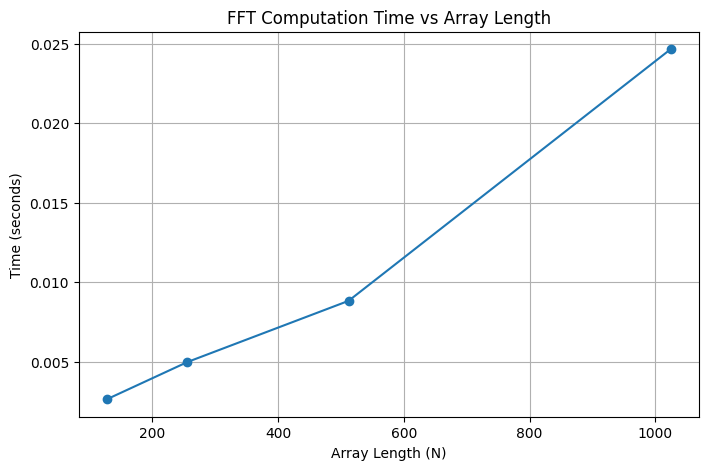

N =  128 → Time = 0.002632 s
N =  256 → Time = 0.004976 s
N =  512 → Time = 0.008824 s
N = 1024 → Time = 0.024668 s


In [26]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Measure FFT computation time for different lengths
lengths = [128, 256, 512, 1024]
times = []

for N in lengths:
    x = np.random.rand(N)  # random signal
    start = time.perf_counter()
    fft1(x)
    end = time.perf_counter()
    times.append(end - start)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(lengths, times, marker='o')
plt.title("FFT Computation Time vs Array Length")
plt.xlabel("Array Length (N)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# Print timing data
for N, t in zip(lengths, times):
    print(f"N = {N:4d} → Time = {t:.6f} s")


## (f) 2D DFT and 2-D FFT of Images I1, I2, I3

C:\Users\Margamitra\AppData\Local\Temp\ipykernel_41916\4074169681.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.asarray(x, dtype=float)


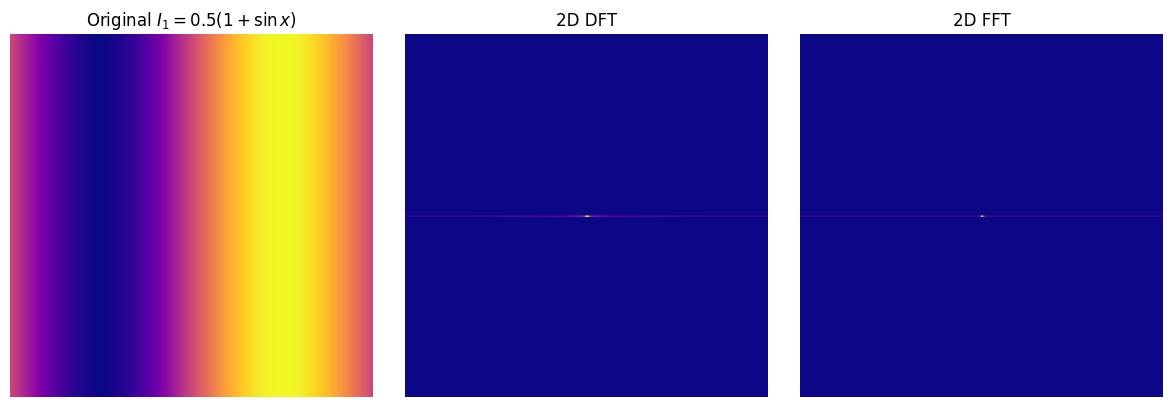

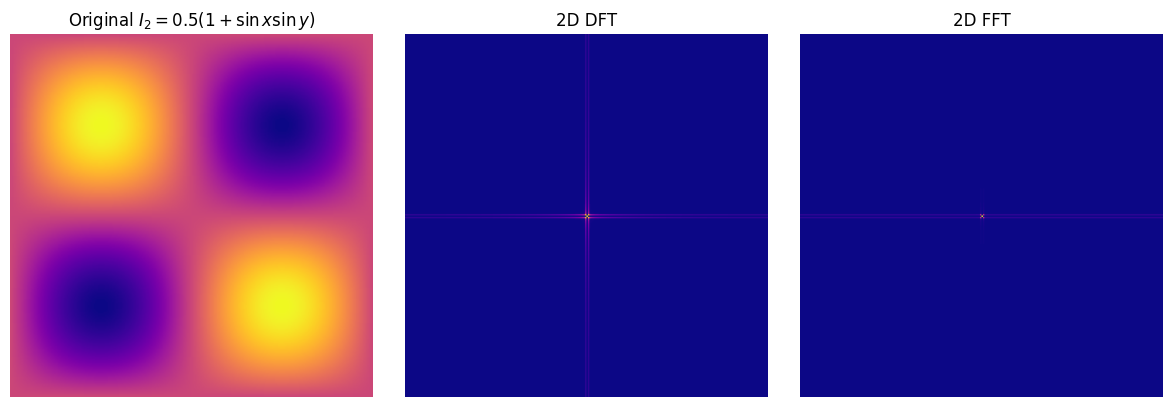

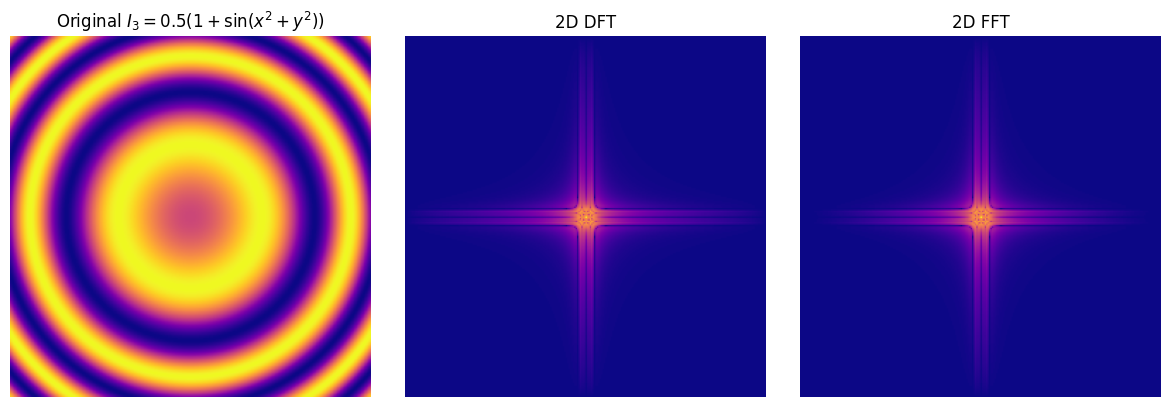

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 1D FFT and 2D FFT functions
def fft1(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        N_new = 2 ** int(np.ceil(np.log2(N)))
        x = np.pad(x, (0, N_new - N), mode='constant')
        N = N_new

    if N <= 1:
        return x

    X_even = fft1(x[::2])
    X_odd  = fft1(x[1::2])
    factor = np.exp(-2j * np.pi * np.arange(N) / N)

    X = np.concatenate([
        X_even + factor[:N // 2] * X_odd,
        X_even - factor[:N // 2] * X_odd
    ])
    return X

def fft2(x):
    x = np.asarray(x, dtype=float)
    rows, cols = x.shape

    def next_pow2(n):
        return 2 ** int(np.ceil(np.log2(n)))

    new_rows, new_cols = next_pow2(rows), next_pow2(cols)
    if (new_rows != rows) or (new_cols != cols):
        x = np.pad(x, ((0, new_rows - rows), (0, new_cols - cols)), mode='constant')

    # Row-wise FFT
    X = np.array([fft1(row) for row in x])
    # Column-wise FFT
    X = np.array([fft1(col) for col in X.T]).T
    return X


# Creating synthetic image signals
N = 256  # image size
x = np.linspace(-np.pi, np.pi, N)
y = np.linspace(-np.pi, np.pi, N)
X, Y = np.meshgrid(x, y)

I1 = 0.5 * (1 + np.sin(X))
I2 = 0.5 * (1 + np.sin(X) * np.sin(Y))
I3 = 0.5 * (1 + np.sin(X**2 + Y**2))

images = [I1, I2, I3]
titles = [r"$I_1 = 0.5(1 + \sin x)$",
          r"$I_2 = 0.5(1 + \sin x \sin y)$",
          r"$I_3 = 0.5(1 + \sin(x^2 + y^2))$"]

# Computing 2D-DFT using numpy and 2D-FFT using custom fft2 ---
for i, I in enumerate(images):
    F_dft = np.fft.fft2(I)
    F_fft = fft2(I)

    # Shift for visualization
    F_dft_shifted = np.fft.fftshift(np.abs(F_dft))
    F_fft_shifted = np.fft.fftshift(np.abs(F_fft))

    # --- Step 3: Plot ---
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(I, cmap='plasma')
    plt.title(f"Original {titles[i]}")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(np.log1p(F_dft_shifted), cmap='plasma')
    plt.title("2D DFT")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(np.log1p(F_fft_shifted), cmap='plasma')
    plt.title("2D FFT")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
